# Loan Eligibility Prediction

Jessica Rodriguez

Flatiron School

Github: jesrodriguez0816

## Data Understanding
* Build a **binary classifier** to predict whether a borrower woud default on a loan
* Identify the primary determinants of risk
* Look for any predictable patterns

## Data Preparation
* Import libraries and packages
* Inspect the data
* Clean the data to prepare for modeling

### Import Libraries and Packages

In [1]:
#Import libraries and packages
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import numpy as np
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt

from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
import shap

from sklearn import tree
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout

/Users/jessicarodriguez/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Inspect the Data

In [2]:
# importing the zipfile module
from zipfile import ZipFile

In [3]:
#Inspect the first 5 rows of data
df = pd.read_csv('Data/Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
#Inspect data shape
print("The dataset has",df.shape[0],"rows and" , df.shape[1], 'columns' )

The dataset has 252000 rows and 13 columns


In [5]:
# Inspect datatypes
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [6]:
#Identify and list the names of each column
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

There are 12 columns in this dataset:
* **income**
* **age**
* **experience**
* **married**
* **house_ownership**
* **car_ownership**
* **risk_flag**
* **currentjobyears**
* **currenthouseyears**
* **city**
* **state**

The **"risk_flag"** column indicates whether there has been a past loan default. This will be our target variable.

In [7]:
# Calculate risk rate
count = df['Risk_Flag'].sum()
print('Count of True values in Risk_Flag Column : ', count)

Count of True values in Risk_Flag Column :  30996


In [8]:
#remove scientific notation from appropriate columns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
#Get information
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000,252000.000
mean,126000.500,4997116.665,49.954,10.084,6.334,11.998,0.123
std,72746.278,2878311.014,17.064,6.003,3.647,1.399,0.328
min,1.000,10310.000,21.000,0.000,0.000,10.000,0.000
25%,63000.750,2503015.000,35.000,5.000,3.000,11.000,0.000
50%,126000.500,5000694.500,50.000,10.000,6.000,12.000,0.000
75%,189000.250,7477502.000,65.000,15.000,9.000,13.000,0.000
max,252000.000,9999938.000,79.000,20.000,14.000,14.000,1.000


In [10]:
# Get information
# Check categorical variables (variables that are not quantifiable)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


**Categorical variables**: Married/Single, House_Ownership, Car_Ownership, Profession, City, State

In [11]:
# How many unique categorical variables are there?
categorical = df.select_dtypes(["category", "object"]).columns

for cat_col in categorical:
    print(f"{cat_col}: {df[cat_col].nunique()} uniqueness variable")

Married/Single: 2 uniqueness variable
House_Ownership: 3 uniqueness variable
Car_Ownership: 2 uniqueness variable
Profession: 51 uniqueness variable
CITY: 317 uniqueness variable
STATE: 29 uniqueness variable


In [12]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

Id                 0
Income             0
Age                0
Experience         0
Married/Single     0
House_Ownership    0
Car_Ownership      0
Profession         0
CITY               0
STATE              0
dtype: int64

There are no missing data points in any column.

### Clean the Data
* Adjust columns as needed.

* Address class imbalance

In [13]:
# List all columns
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [14]:
# Lowercase column names
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [15]:
# Rename columns
df.rename(columns={"married/single": "married_single"}, inplace=True)
df.columns

Index(['id', 'income', 'age', 'experience', 'married_single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [16]:
# Clean characters in city and state columns
df.city = df.city.str.extract("([A-Za-z]+)")
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'Aligarh'

In [17]:
df.state = df.state.str.extract("([A-Za-z]+)")
df.state.unique()

array(['Madhya', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil', 'Gujarat',
       'Rajasthan', 'Telangana', 'Bihar', 'Andhra', 'West', 'Haryana',
       'Puducherry', 'Karnataka', 'Uttar', 'Himachal', 'Punjab',
       'Tripura', 'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu',
       'Delhi', 'Chhattisgarh', 'Chandigarh', 'Manipur', 'Sikkim'],
      dtype=object)

Now we need to balance the dataset.

In order to have normal distribution, our classes need to be equivalent.

In [18]:
#Random Sample
df = df.sample(frac=1)


In [19]:
# Normalize the data

risk_data = df.loc[df["risk_flag"] == 1]
not_risk_data = df.loc[df["risk_flag"] == 0][:30996]

normal_distributed_data = pd.concat([risk_data, not_risk_data])

In [20]:
# Shuffle dataframe rows
df_loan = normal_distributed_data.sample(frac=1, random_state=42)
df_loan.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
13812,13813,9240885,49,19,single,rented,yes,Surgeon,Asansol,West,14,13,0
125840,125841,9249971,69,4,single,rented,no,Physician,Pali,Rajasthan,4,14,0
155790,155791,3390339,22,19,single,rented,no,Comedian,Davanagere,Karnataka,3,13,0
218431,218432,9290440,59,5,single,rented,no,Civil_servant,Nashik,Maharashtra,5,11,1
187597,187598,5953603,29,11,single,rented,yes,Mechanical_engineer,Nagpur,Maharashtra,7,10,1


Risk_flag distribution
1   0.500
0   0.500
Name: risk_flag, dtype: float64


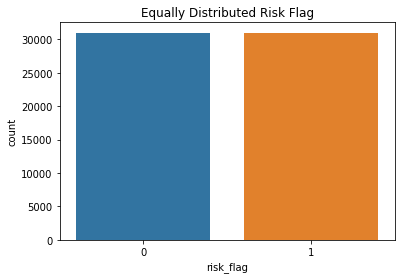

In [21]:
print("Risk_flag distribution")
print(df_loan["risk_flag"].value_counts() / len(df_loan))

sns.countplot("risk_flag", data=df_loan)
plt.title('Equally Distributed Risk Flag', fontsize=12);

## Statistics and Visualization
* Identify correlations between variables
* Get statistics
* Create visualizations

In [22]:
# Get information on 
df_loan.describe()

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000
mean,128998.208,4990145.477,49.488,9.840,6.277,11.994,0.500
std,76258.299,2897147.365,17.178,6.042,3.704,1.402,0.500
min,4.000,10310.000,21.000,0.000,0.000,10.000,0.000
25%,61939.250,2467337.250,34.000,5.000,3.000,11.000,0.000
50%,129437.500,4977116.000,49.000,10.000,6.000,12.000,0.500
75%,199396.250,7520737.250,64.000,15.000,9.000,13.000,1.000
max,252000.000,9999180.000,79.000,20.000,14.000,14.000,1.000


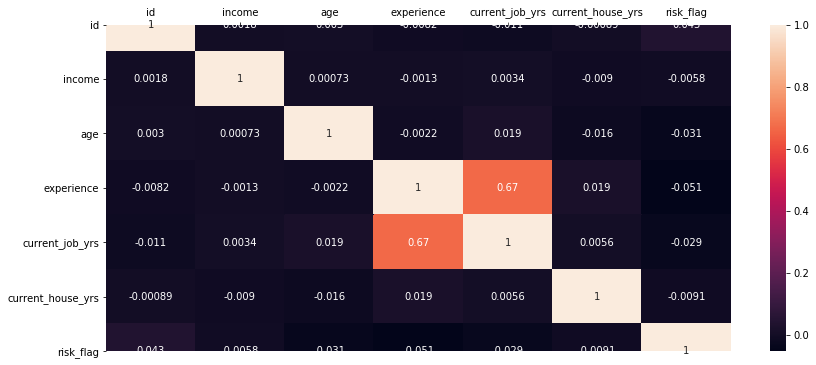

In [23]:
# Create a heatmap for comparison to target variable
# Each square shows the correlation between the variables on each axis
# Values closer to zero indicate that there is no linear trend between the variables
# The closer to 1 the correlation is the more positively correlated they are
import matplotlib.pyplot as plt
M_correlation = plt.figure(figsize = (14, 6))
ax = sns.heatmap(df_loan.corr(),annot=True); 
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

The heatmap shows that "income", "age", "experience", "current_job_yrs" and "current_house_yrs" are highly correlated with our target variable.

### Get Statistics on Categorical Variables

In [24]:
# Group profession by income
# Determine min, max, and mean
df_loan.groupby("profession")["income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

profession,Drafter,Secretary,Computer_hardware_engineer,Biomedical_Engineer,Hotel_Manager,Analyst,Civil_engineer,Official,Geologist,Financial_Analyst,...,Civil_servant,Chef,Aviator,Graphic_Designer,Petroleum_Engineer,Chartered_Accountant,Chemical_engineer,Design_Engineer,Librarian,Surgeon
min,64805.000,143036.000,13357.000,51974.000,17801.000,91459.000,48245.000,216875.000,62100.000,80183.000,...,11430.000,15016.000,98725.000,10675.000,80603.000,23621.000,26926.000,53886.000,59715.000,18215.000
max,9999180.000,9998070.000,9994501.000,9993989.000,9992692.000,9992133.000,9992098.000,9991569.000,9991298.000,9990776.000,...,9938741.000,9935369.000,9935192.000,9935166.000,9933264.000,9926354.000,9914171.000,9913743.000,9908353.000,9906039.000
mean,4336224.192,5412463.729,5286197.039,5233547.188,4899360.293,4788868.305,5090677.677,4717322.235,4791973.406,4794597.918,...,4707937.469,5171501.265,5048814.155,4644798.334,5439407.091,5219596.748,5532276.575,4613048.609,4989289.639,5228233.167


In [25]:
# The average risk percentage of each city
df_loan.groupby(["city"]).risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

city,Bhubaneswar,Bettiah,Gwalior,Kottayam,Raiganj,Barasat,Purnia,Kochi,Bardhaman,Buxar,...,Rajpur,Mehsana,Latur,Berhampur,Sultan,Belgaum,Bangalore,Bijapur,Dehradun,Gandhinagar
risk_flag,75.862,74.847,74.009,70.930,70.492,70.068,69.822,69.628,68.636,67.456,...,24.390,23.944,23.232,22.807,22.785,22.148,21.951,18.692,16.667,14.783


In [26]:
# The average risk percentage of each state
df_loan.groupby("state").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

state,Manipur,Tripura,Kerala,Jammu,Madhya,Odisha,Rajasthan,Chhattisgarh,Assam,Jharkhand,...,Andhra,Mizoram,Puducherry,Delhi,Tamil,Karnataka,Chandigarh,Punjab,Uttarakhand,Sikkim
risk_flag,64.437,59.130,58.859,57.873,56.316,54.116,53.811,52.464,52.218,52.183,...,47.840,47.475,47.042,46.781,45.786,44.053,41.781,41.103,36.141,25.926


In [27]:
# The average risk percentage of each profession
df_loan.groupby("profession").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

profession,Police_officer,Chartered_Accountant,Army_officer,Surveyor,Software_Developer,Civil_engineer,Air_traffic_controller,Scientist,Hotel_Manager,Geologist,...,Surgeon,Chemical_engineer,Politician,Design_Engineer,Financial_Analyst,Web_designer,Industrial_Engineer,Economist,Technology_specialist,Petroleum_Engineer
risk_flag,59.467,57.261,56.047,55.738,55.026,54.333,53.318,53.282,52.906,52.821,...,46.537,46.369,46.058,46.042,45.790,45.588,44.617,43.738,40.292,40.206


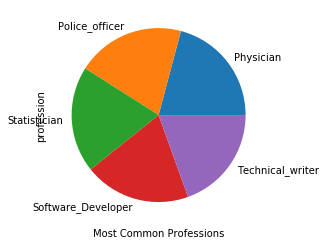

In [28]:
#Visualize the top 5 most common professions in a pie chart
top_states = df_loan.profession.value_counts()
top_states[:5].plot(kind='pie')
plt.xlabel('Most Common Professions');

In [29]:
# Build a function to visualize categorical data
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))
    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)


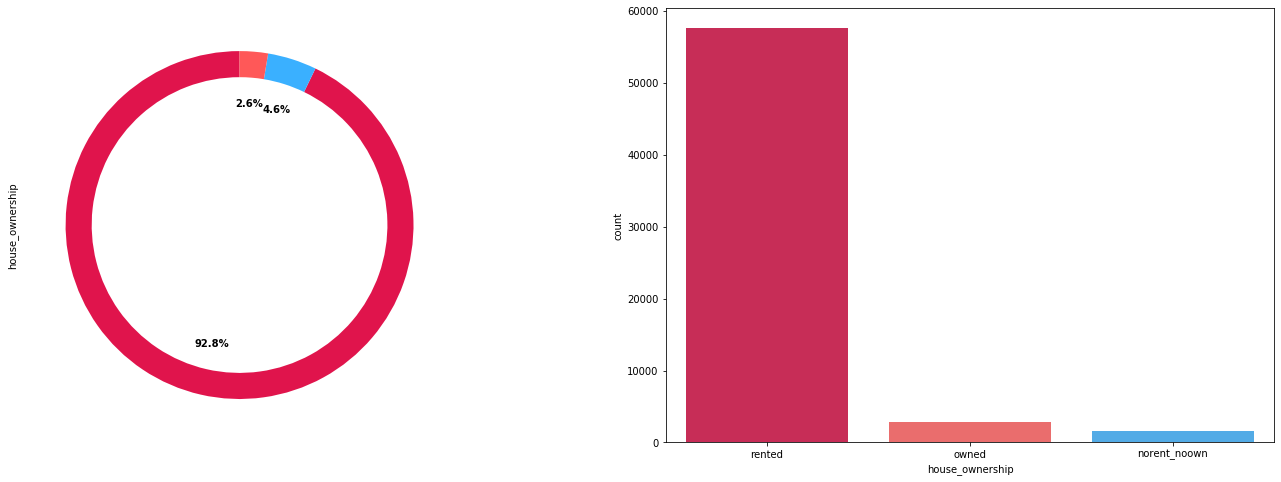

In [30]:
loan_house_ownership = df_loan["house_ownership"].value_counts()

count_pie_plot(datapie=loan_house_ownership,
               datacount=df_loan,
               colcount="house_ownership",
               colpiey=loan_house_ownership.values,
               text1="House Ownership",
               pielabels=["Rented", "Owned", "No rent No own"],
               text2="What customer house status?",
               piecomap=["#E0144C", "#3AB0FF", "#FF5858"],
               countcomap=["#E0144C", "#FF5858", "#3AB0FF"],
               xlabel="Married Single",
               piefs=10,
               yplus=5000,
               pctdistance=0.7,
               ylabel="Count of Observations",
               xticklabel=["Rented", "No rent No own", "Owned"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

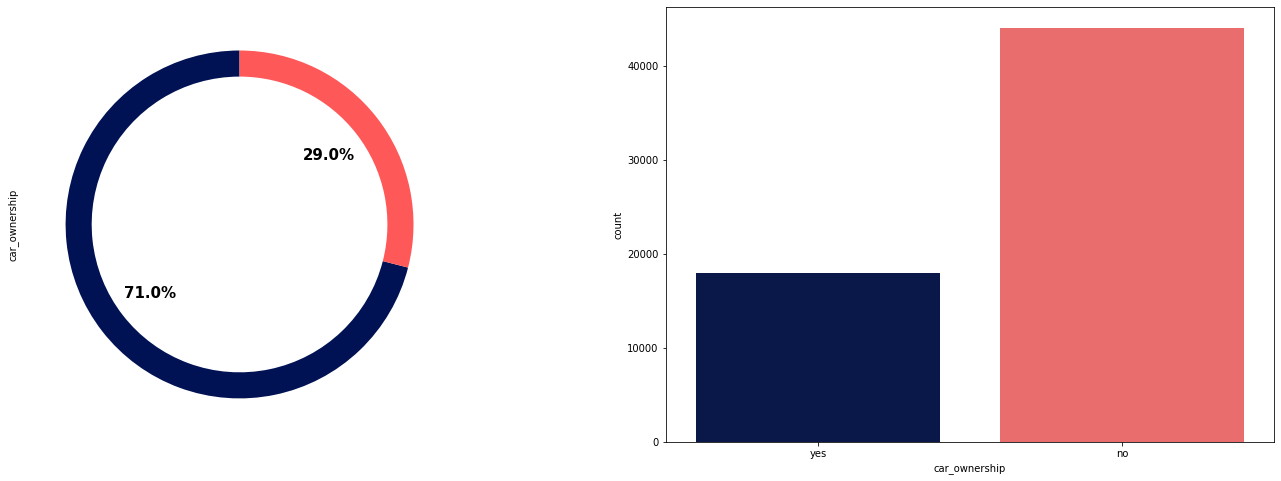

In [31]:
loan_car_ownership = df_loan["car_ownership"].value_counts()

count_pie_plot(datapie=loan_car_ownership,
               datacount=df_loan,
               colcount="car_ownership",
               colpiey=loan_car_ownership.values,
               text1="Car Ownership",
               pielabels=["No", "Yes"],
               text2="Does customer owned a car?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Car Ownership",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["No", "Yes"],
               yticklabel=list(np.arange(0, 225000, 25000)),
               ystart=0,
               yend=200000);

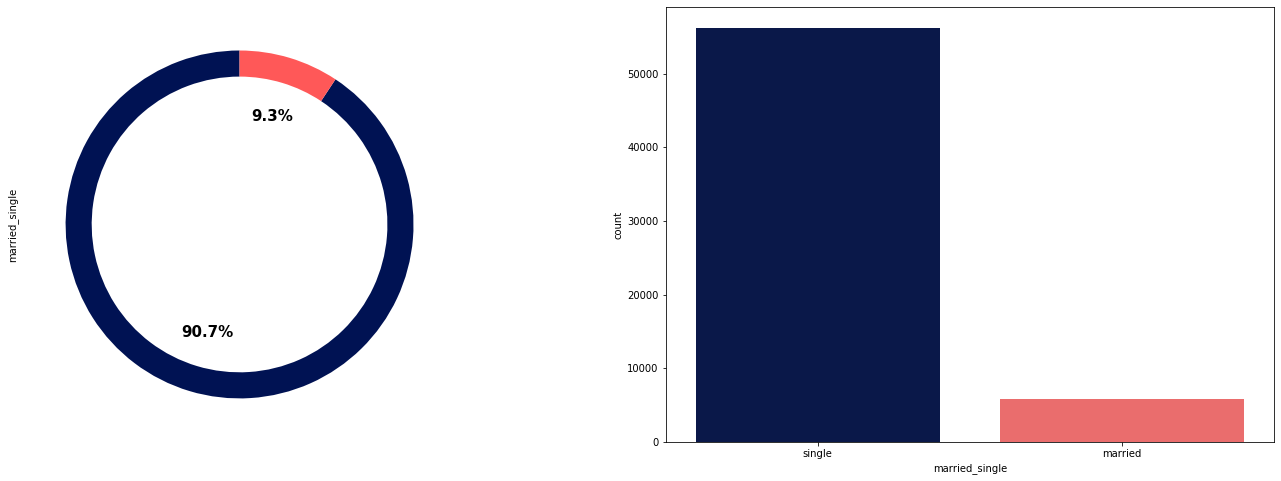

In [32]:

loan_married_single = df_loan["married_single"].value_counts()

count_pie_plot(datapie=loan_married_single,
               datacount=df_loan,
               colcount="married_single",
               colpiey=loan_married_single.values,
               text1="Married or Single",
               pielabels=["Single", "Married"],
               text2="Are you Married or Single?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="Married Single",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["Single", "Married"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

Categorical Takeaways:
    
* Most common professions: physician, psychologist, computer engineer, police office, statitiscian
   
* Most borrowers are single
    
* Most borrowers do not own a home
    
* Most borrowers do not own a car

### Get Statistics on Numerical Variables

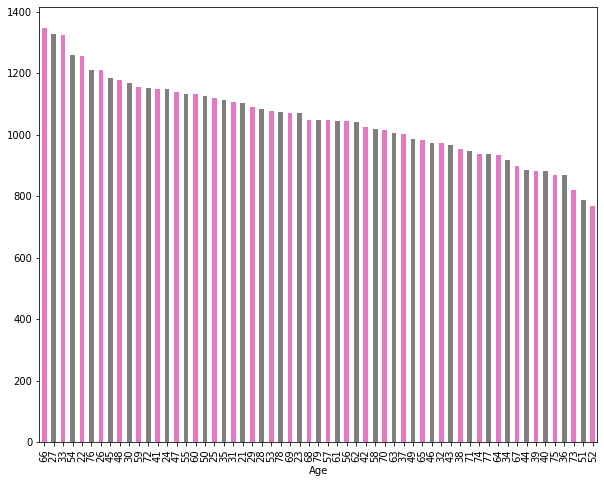

In [33]:
# Visualize age totals
plt.subplots(figsize=(10,8))
color=['#e377c2', '#7f7f7f']
plt.xlabel('Age')
df_loan['age'].value_counts().plot(kind='bar',color=color)

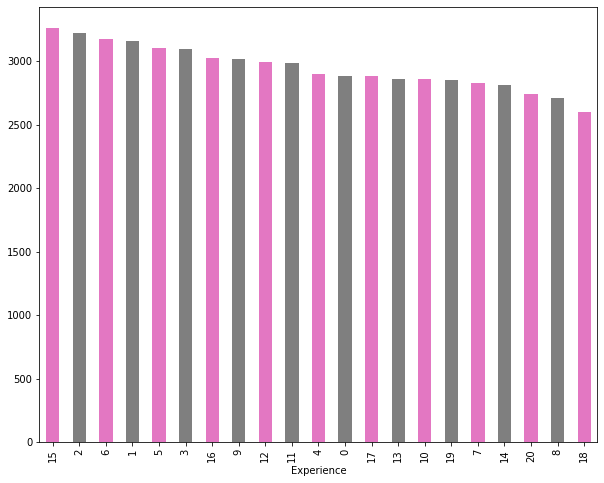

In [34]:
# Visualize experience totals
plt.subplots(figsize=(10,8))
color=['#e377c2', '#7f7f7f']
plt.xlabel('Experience')
df_loan['experience'].value_counts().plot(kind='bar',color=color)

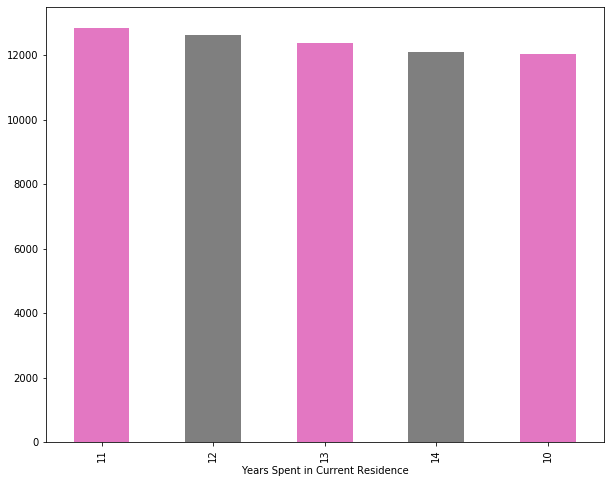

In [35]:
# Visualize current house years totals
plt.subplots(figsize=(10,8))
color=['#e377c2', '#7f7f7f']
plt.xlabel('Years Spent in Current Residence')
df_loan['current_house_yrs'].value_counts().plot(kind='bar',color=color)

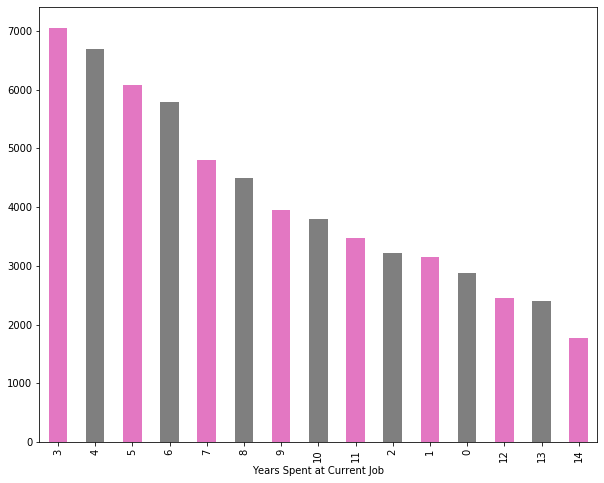

In [36]:
# Visualize current job years totals
plt.subplots(figsize=(10,8))
color=['#e377c2', '#7f7f7f']
plt.xlabel('Years Spent at Current Job')
df_loan['current_job_yrs'].value_counts().plot(kind='bar',color=color)

Numerical Takeaways:

* Most borrowers have been in at thier current job between 3 and 10 years
    
* The years borrowers have spent in their current residence is evenly spaced between 11 and 14 years
    
* The age of borrowers ranges from early twenties to early seventies

## Modeling
* Perform a train-test split
* Build and tune classifiers
* Evaluate each classifier to determine best fit

In [37]:
# convert categorical data into dummy or indicator variables
convert = ['married_single', 'house_ownership', 'car_ownership', 'profession' ]
convert_data = pd.get_dummies(df_loan[convert])
convert_data

,married_single_married,married_single_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes,profession_Air_traffic_controller,profession_Analyst,profession_Architect,...,profession_Scientist,profession_Secretary,profession_Software_Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical_writer,profession_Technician,profession_Technology_specialist,profession_Web_designer
13812,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125840,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155790,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218431,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187597,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182788,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232759,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184908,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13380,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
data_f = pd.concat([df_loan, convert_data], axis=1)
data_f

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,...,profession_Scientist,profession_Secretary,profession_Software_Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical_writer,profession_Technician,profession_Technology_specialist,profession_Web_designer
13812,13813,9240885,49,19,single,rented,yes,Surgeon,Asansol,West,...,0,0,0,0,1,0,0,0,0,0
125840,125841,9249971,69,4,single,rented,no,Physician,Pali,Rajasthan,...,0,0,0,0,0,0,0,0,0,0
155790,155791,3390339,22,19,single,rented,no,Comedian,Davanagere,Karnataka,...,0,0,0,0,0,0,0,0,0,0
218431,218432,9290440,59,5,single,rented,no,Civil_servant,Nashik,Maharashtra,...,0,0,0,0,0,0,0,0,0,0
187597,187598,5953603,29,11,single,rented,yes,Mechanical_engineer,Nagpur,Maharashtra,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182788,182789,4406338,78,17,single,rented,no,Fashion_Designer,Vadodara,Gujarat,...,0,0,0,0,0,0,0,0,0,0
232759,232760,5276071,22,16,single,rented,no,Firefighter,Miryalaguda,Telangana,...,0,0,0,0,0,0,0,0,0,0
184908,184909,9645128,26,2,single,rented,no,Artist,Kavali,Andhra,...,0,0,0,0,0,0,0,0,0,0
13380,13381,4868070,51,17,married,rented,no,Surveyor,Vadodara,Gujarat,...,0,0,0,0,0,1,0,0,0,0


In [39]:
# Drop unnecessary columns
data = data_f.drop('city', axis=1)

In [40]:
# Drop unnecessary columns
data = data.drop('state', axis=1)

In [41]:
# Drop unnecessary columns
data = data.drop('id', axis=1)

In [42]:
# Use StandardScaler to remove the mean and scale the data to unit variance
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
features = ['married_single','car_ownership', 'house_ownership', 'profession']
label_encoder = LabelEncoder()

for col in features:
    data[col] = label_encoder.fit_transform(data[col])

In [44]:
data

,income,age,experience,married_single,house_ownership,car_ownership,profession,current_job_yrs,current_house_yrs,risk_flag,...,profession_Scientist,profession_Secretary,profession_Software_Developer,profession_Statistician,profession_Surgeon,profession_Surveyor,profession_Technical_writer,profession_Technician,profession_Technology_specialist,profession_Web_designer
13812,9240885,49,19,1,2,1,45,14,13,0,...,0,0,0,0,1,0,0,0,0,0
125840,9249971,69,4,1,2,0,37,4,14,0,...,0,0,0,0,0,0,0,0,0,0
155790,3390339,22,19,1,2,0,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0
218431,9290440,59,5,1,2,0,11,5,11,1,...,0,0,0,0,0,0,0,0,0,0
187597,5953603,29,11,1,2,1,33,7,10,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182788,4406338,78,17,1,2,0,22,10,10,0,...,0,0,0,0,0,0,0,0,0,0
232759,5276071,22,16,1,2,0,24,12,10,0,...,0,0,0,0,0,0,0,0,0,0
184908,9645128,26,2,1,2,0,4,2,11,1,...,0,0,0,0,0,0,0,0,0,0
13380,4868070,51,17,0,2,0,46,6,13,1,...,0,0,0,0,0,1,0,0,0,0


### Perform a Train-Test Split on All Data

In [45]:
# Define x and y
x = data.drop(columns='risk_flag')
y = data.risk_flag

In [46]:
# Check the new class sizes
y.value_counts()

1    30996
0    30996
Name: risk_flag, dtype: int64

In [47]:
x.shape

(61992, 67)

In [48]:
# Create a train-test split with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
# Train Set
print('Training Set: ')
print(y_train.value_counts())
print('Normalized:')
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print('Test Set:')
print(y_test.value_counts())
print('Normalized:')
print(y_test.value_counts(normalize=True))

Training Set: 
1    24838
0    24755
Name: risk_flag, dtype: int64
Normalized:
1   0.501
0   0.499
Name: risk_flag, dtype: float64


Test Set:
0    6241
1    6158
Name: risk_flag, dtype: int64
Normalized:
0   0.503
1   0.497
Name: risk_flag, dtype: float64


### What is the best metric to use to maximize the reults?
Because classes in this dataset are imbalanced, accuracty was not used at a metric. An accuracy score would have the potential to be high and misleading. Insterad, the **recall score and F1 score were considered**.

In statistics, a type I error is a false-positive result, meaning that a null hypothesis is rejected when it is actually true. A type II error is a false-negative result, meaning that a null hypethesis is rejeced when it is actually true.

A false negative would mean that the reality of a customer canceling would have been overlooked.

My goal is to *build a classifier that minimizes false negatives*.

### Logistic Regression Model
An ROC Curve can be used to show the diagnostic ability of a classification model. This curve plots two parameters: true positive rate and false positive rate.

The Area Under the ROC Curve (AUC) evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better.

In [50]:
# Initial Model
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

AUC: 0.521949814943652


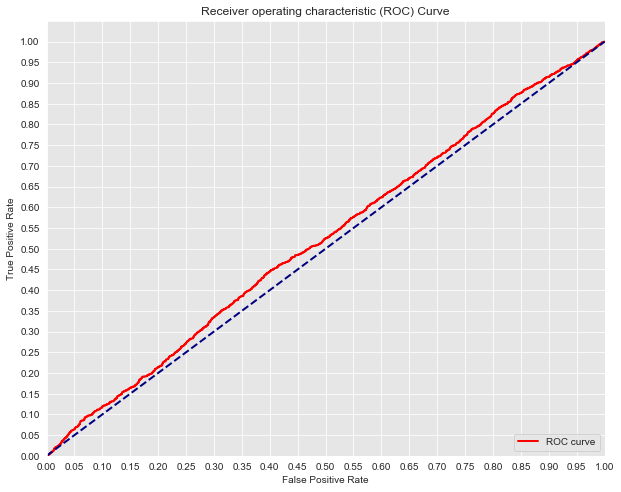

In [51]:
# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Initiate Seaborn
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC (area under curve)

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color = 'red',
         lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC curve is .5. This indicates that the model is porrly classifying true positive and false postives.

In [52]:
y_pred = logreg.predict(X_test)

In [53]:
# Create a confustion matrix to measure recall, precision, accuracy, and the AUC-ROC curve
cm = confusion_matrix(y_test, y_pred)
cm

array([[3831, 2410],
       [3515, 2643]])

In [54]:
# Test recall to predict how good the model is at predicting cancellations (type 2 errors)
recall_score(y_test, y_pred)

0.4291977914907438

The model has a very low recall score, indicating imbalanced classes.


### K-Nearest Neighbors Model

In [55]:
# Load classifier and fit data
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)

In [56]:
# Create metric function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.8402948402948403
Recall Score: 0.8330626826891848
Accuracy Score: 0.838454714089846
F1 Score: 0.8366631330017125


Precision and recall of k-nearest neighbors is significantly higher than logistic regression.

### Random Forest
This classifier fits a number of decision tree classifiers on various sub-samples of the data and uses averaging to improve accuracy and control over-fitting.

In [57]:
SEED = 1

In [58]:
# Load classifier and fit data
forest = RandomForestClassifier(n_estimators=20, max_depth= 11, random_state = SEED)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [59]:
y_pred = forest.predict(X_test)


In [60]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  

[[4229 2012]
 [1846 4312]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      6241
           1       0.68      0.70      0.69      6158

    accuracy                           0.69     12399
   macro avg       0.69      0.69      0.69     12399
weighted avg       0.69      0.69      0.69     12399



In [61]:
# Get training and testing scores
forest.score(X_train, y_train)

0.7231060835198516

In [62]:
forest.score(X_test, y_test)

0.6888458746673118

In [63]:
# Get recall score
recall_score(y_test, y_pred)

0.7002273465410848

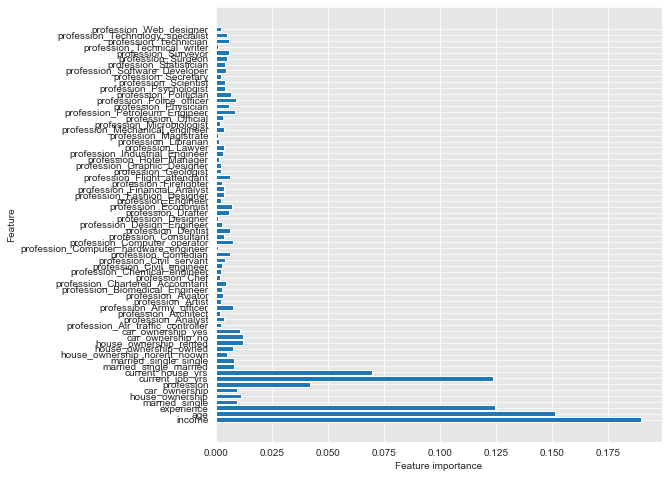

In [64]:
# Plot feature importances on training data
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

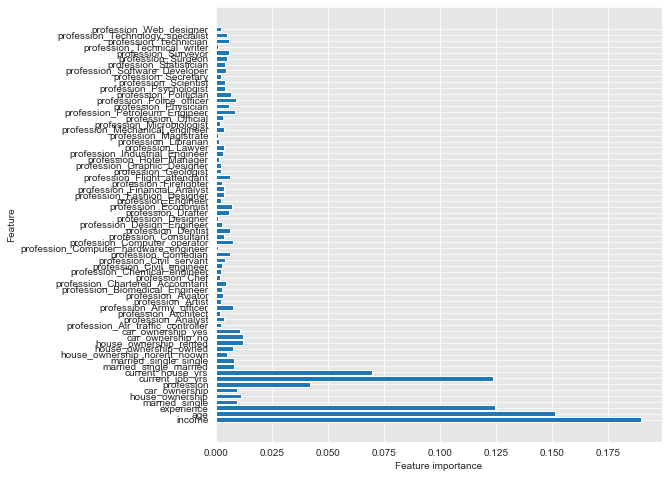

In [65]:
# Plot feature importances on testing data
def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_test.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

### Bagged Trees + Decision Tree Model
Decision trees have low bias but high variance, which can lead to overfitting and drastic output changes when small input changes are made. A bagging classifier can be used to reduce variance in the dataset.

The ensemble method for decision trees uses Bagging and the Subspace Sampling method to create variance among the trees. For each tree, we sample two-thirds of the training data and the remaining third is used to calculate the out-of-bag error.

In [66]:
# Load bagged tree classifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=4), 
                                 n_estimators=20, random_state = SEED)

In [67]:
# Fit the classifier to the training and testing data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [68]:
# Return the mean accuracy of training set
bagged_tree.score(X_train, y_train)

0.5618333232512653

In [69]:
y_pred = bagged_tree.predict(X_test)

In [70]:
#Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4284 1957]
 [3513 2645]]
              precision    recall  f1-score   support

           0       0.55      0.69      0.61      6241
           1       0.57      0.43      0.49      6158

    accuracy                           0.56     12399
   macro avg       0.56      0.56      0.55     12399
weighted avg       0.56      0.56      0.55     12399



In [71]:
# Get recall score
recall_score(y_test, y_pred)

0.429522572263722

In [72]:
# Optimizing for Entropy (the amount of uncertainty in possible outcomes)
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=4), 
                                 n_estimators=20, random_state = SEED)

In [73]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [74]:
# Get the recall score for the training and testing data
bagged_tree.score(X_train, y_train)

0.5640312140826327

In [75]:
bagged_tree.score(X_test, y_test)

0.5623034115654488

In [76]:
y_pred = bagged_tree.predict(X_test)

In [77]:
#Print the confision matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4200 2041]
 [3386 2772]]
              precision    recall  f1-score   support

           0       0.55      0.67      0.61      6241
           1       0.58      0.45      0.51      6158

    accuracy                           0.56     12399
   macro avg       0.56      0.56      0.56     12399
weighted avg       0.56      0.56      0.56     12399



In [78]:
recall_score(y_test, y_pred)

0.4501461513478402

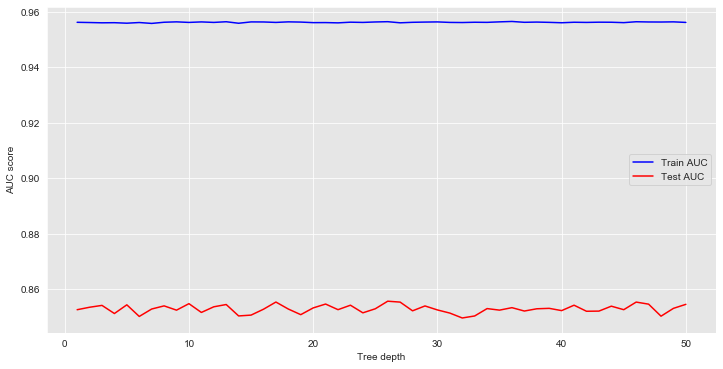

In [79]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state = SEED), n_estimators=20)   
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [80]:
#Load classifier with new maximum depth
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth= 5), 
                                 n_estimators=20, random_state = SEED)


In [81]:
#Fit classifier to the training and testing data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [82]:
y_pred = bagged_tree.predict(X_test)

In [83]:
# Optimizing the maximum depth for increased recall
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4154 2087]
 [3191 2967]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.61      6241
           1       0.59      0.48      0.53      6158

    accuracy                           0.57     12399
   macro avg       0.58      0.57      0.57     12399
weighted avg       0.58      0.57      0.57     12399



In [84]:
recall_score(y_test, y_pred)

0.4818122767132186

### AdaBoost Model
This will be the first attempt to "boost" the data.

Adaboost creates new classifiers by continually influencing the distribution of the data sampled to train each successive learner. The prediction error in this classification model measures how well the model predicts the target variable (risk_flag).

In [85]:
# Load the classifier
adaboost_clf = AdaBoostClassifier(random_state= SEED)

In [86]:
# Fit the classifier to the training and testing data
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [87]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

In [88]:
# Print training and testing scores

print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.5559353504663037
Recall Score: 0.5303969723810291
Accuracy Score: 0.5526183130683766
F1 Score: 0.5428659730091686


In [89]:
print_metrics(y_test, adaboost_test_preds)

Precision Score: 0.5465546218487395
Recall Score: 0.5280935368626177
Accuracy Score: 0.548028066779579
F1 Score: 0.5371655104063429


In [90]:
# Print recall score
recall_score(y_test, y_pred)

0.4818122767132186

### Gradient Boost Model
This will be the second attempt to boost the data. Gradient Boost uses the next possible best model combined with previous models to minimize the overall prediction error. The prediction error in this classification model measures how well the model predicts the target variable (risk_churn).

In [91]:
# Load necessary package
gbt_clf = GradientBoostingClassifier(random_state=SEED)

In [92]:
# Fit to training and testing data
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [93]:
# Get predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [94]:
# Print training and testing scores
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.6229898749255509
Recall Score: 0.631693373057412
Accuracy Score: 0.6240800112919161
F1 Score: 0.6273114367391


In [95]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.6002225401367032
Recall Score: 0.6131860993829166
Accuracy Score: 0.6050487942576014
F1 Score: 0.6066350710900473


In [96]:
# Get classification report
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.61      0.60      0.60      6241
           1       0.60      0.61      0.61      6158

    accuracy                           0.61     12399
   macro avg       0.61      0.61      0.61     12399
weighted avg       0.61      0.61      0.61     12399



In [97]:
recall_score(y_test, y_pred)

0.4818122767132186

### XBoost Model

In [98]:
# Load and fit the XBoost Classifier to the data
# Print recall scores

xg = XGBClassifier(random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 61.54%
Validation accuracy: 59.92%
Training Recall: 62.36%
Test Recall: 60.52%


In [99]:
# Tune the model with GridsearchCV

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [100]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 83.27%
Validation accuracy: 79.76%
Training Recall: 83.53%
Test Recall: 79.7%


In [101]:
# Increase optimal parameters
xg = XGBClassifier(max_depth = 6, learning_rate = .2, n_estimators = 100, min_child_weight = 1, subsample = .7, random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 83.27%
Validation accuracy: 79.76%
Training Recall: 83.53%
Test Recall: 79.7%


In [102]:
# Array of most important features
xg.feature_importances_

array([0.0153857 , 0.01395271, 0.0141432 , 0.01403329, 0.01406103,
       0.01216947, 0.01471024, 0.01375786, 0.01292928, 0.        ,
       0.        , 0.        , 0.01190979, 0.        , 0.        ,
       0.        , 0.        , 0.01343828, 0.01288034, 0.01889441,
       0.01949048, 0.01879566, 0.01445833, 0.01781744, 0.01661827,
       0.01353582, 0.01381009, 0.01705943, 0.02105192, 0.01920147,
       0.0177172 , 0.01589671, 0.02087175, 0.01816633, 0.01538878,
       0.0166732 , 0.02301436, 0.01604116, 0.01401536, 0.01955069,
       0.01254707, 0.02142063, 0.01600324, 0.01455608, 0.01194952,
       0.01670918, 0.01897911, 0.01776179, 0.01809125, 0.01743587,
       0.01735585, 0.01860582, 0.01616393, 0.0175151 , 0.02292589,
       0.02402985, 0.01677485, 0.01942766, 0.01898378, 0.01683949,
       0.02250208, 0.01860534, 0.01397505, 0.01856056, 0.01770334,
       0.02313753, 0.        ], dtype=float32)

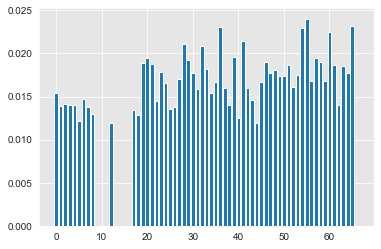

In [103]:
plt.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
plt.show()

## Evaluating Best-Fit Model
The XBoost model has a recall score of about 76%. However, the results are more difficult to interpret and the model is prone to overemphasizing outliers, causing overfitting.

The random forrest model has an recall score of 73%. I have decided to use this model for further analysis, as I believe the results will be easier to interpret.

In [104]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)

In [105]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8544527308671678

In [106]:
recall_score(y_test, y_pred)

0.834686586554076

### Visualize Results of Model using SHAP
SHAPley Additive exPlanations is a tool that creates visualizations for a machine learning model. The resource I used to fit SHAP to my data can be found [HERE.](https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7)

In [107]:
!pip install shap

In [ ]:

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)


In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10, title="Risk of Loan Default")

In the bar plot above, class 1 (blue) indicates no risk, while class 0 (red) indicates risk.

In [ ]:
# Initiate javascript
shap.initjs()

### Features Contributing to Pushing Model Output
The force plot below allows us to see how features contributed to the model’s prediction for a customer churn. Features pushing the prediction higher are shown in red. Those pushing the prediction lower are in blue. The number associated with the feature shows the value that is impacting risk.

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0], features = X_test.iloc[0])

### Reading the SHAP Value Summary Plot
On the right hand side of the graph, the legend for feature value indicates that RED is HIGH feature value and BLUE is LOW feature value. On the y axis, the features are divided individually.

The x axis at the bottom ranks how significant the impact is.

*If the feature has a tail going to the right, it means that those values are causing an impact on model output that is pushing default risk from zero (no risk) to one (risk).*


In [ ]:
shap.summary_plot(shap_values[1], features=X_test, max_display = 10)

In [ ]:
shap.plots.bar(explainer.expected_value[1], shap_values[1][0], features = X_test.iloc[0])

### SHAP Takeaways

According to the visualizations, the following features are the highest contibutors of loan default:



The following features are the lowest contributors of loan default:

